# **MONARCH DESIGNERS TILL NUMBER APP**
## ***A Business Intelligence PROJECT***
### Ramadhan Mwenda (C) 2024

# Monarch Designers
Monarch Designers is a digital services agency operating out of Mwiki Township in Kasarani Sub County within Nairobi County, Kenya.
The area is approximately 20 km from the Nairobi CBD and has a population of approximately 100,000 people.

Monarch Designers is a service based business that offers Printng, photocopying, Branding and Government Service consultancy. 
The business receives payments in two forms, Cash and via a Till Number. The data that is provided accounts only for the till number. Cash records are unavailable. The business also records sales in an invoicing platform called Wave. The sales records include item sold and price per item. The records are separate from this one. 

## Objective
The objective of this project is to analyze the sales data of Monarch Designers and provide insights on customer payment behaviour and to build a prediction model to forecast till payments.
The business looks to generate a fair estimate of revenues. 
This till number module should provide a baseline for the business forecast for 3 reasons;

1. The data is clean and comes from the MPESA till number Api.
2. The data is available for the entire period of the business operation.
3. The data is scaleable to other till merchants for easier collaboration / sale. 

## Key Questions to answer about the business payment data. 
1. Who are the top customers?
2. What is the average payment amount per transaction/ per customer over time?
3. What is the average payment frequency per customer over time?
4. Are there repeat customers? How much do they count to the total amount paid?
5. Are there patterns in payments? (Weekly, Monthly, Annually)
6. Are there any anomalies in the payments data?
7. Can we predict the next month's payment amount?


In [3]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('transactions.csv', header=1)
df

,Date,Transaction ID,Sender Identifier,Name,Till No.,Fees,Amount,MM System,Status
0,2019-03-29 15:19,NCT7TV33DD,+254707476557,RAMADHAN MWENDA,632868,0.00,20.00,M-PESA,Complete
1,2019-03-29 18:49,NCT9U2D7Y3,+254757140643,HOSEA KIHARA,632868,0.00,200.00,M-PESA,Complete
2,2019-03-29 19:42,NCT4U4TMV8,+254707476557,RAMADHAN MWENDA,632868,0.00,20.00,M-PESA,Complete
3,2019-03-30 15:41,NCU3URX7A1,+254713794210,ABIGAIL MUNENE,632868,0.00,70.00,M-PESA,Complete
4,2019-04-03 11:39,ND39XXKTYF,+254795429253,IAN MUKUNDI,632868,0.00,20.00,M-PESA,Complete
...,...,...,...,...,...,...,...,...,...
10212,2024-08-26 14:43,SHQ7CY0Q91,ab088ad0f0a86a58b27322b5ea1b95408803d1d5da4616...,CHARLES,632868,1.38,250.00,M-PESA,Complete
10213,2024-08-26 16:40,SHQ7DEM4A9,c8c078cd8135d70ceceefebdafbdc065c093ce7e6b6de8...,Sarah,632868,0.00,40.00,M-PESA,Complete
10214,2024-08-26 17:10,SHQ6DJBDHS,4ea94fe16127e48739bdb51304493a48d88183b6fe3f0c...,THIERRY,632868,0.00,20.00,M-PESA,Complete
10215,2024-08-26 19:01,SHQ1E3YA0Z,e549ca972b087b2c0f3d11e8895662f9f448276c05a771...,Patrick,632868,1.38,250.00,M-PESA,Complete


The sender identifier changed in recent months to a hashed figure from the Phone number.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10217 entries, 0 to 10216
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10217 non-null  object 
 1   Transaction ID     10217 non-null  object 
 2   Sender Identifier  10217 non-null  object 
 3   Name               10217 non-null  object 
 4   Till No.           10217 non-null  int64  
 5   Fees               10217 non-null  float64
 6   Amount             10217 non-null  object 
 7   MM System          10217 non-null  object 
 8   Status             10217 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 718.5+ KB


Change date column to datetime and Amount to float

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Amount'] = df['Amount'].astype(float)
df.info()

ValueError: could not convert string to float: '6,386.00'

In [8]:
df.describe(include='all')

,Date,Transaction ID,Sender Identifier,Name,Till No.,Fees,Amount,MM System,Status
count,10217,10217,10217,10217,10217.0,10217.000000,10217,10217,10217
unique,NaN,10217,5186,4768,NaN,NaN,223,1,3
top,NaN,SHQ1E74IV7,+254722223487,WILLIAM MWINGA,NaN,NaN,20.00,M-PESA,Complete
freq,NaN,1,193,193,NaN,NaN,2291,10217,10203
mean,2023-01-05 22:47:37.672506624,NaN,NaN,NaN,632868.0,0.421156,NaN,NaN,NaN
min,2019-03-29 15:19:00,NaN,NaN,NaN,632868.0,0.000000,NaN,NaN,NaN
25%,2022-03-21 11:03:00,NaN,NaN,NaN,632868.0,0.000000,NaN,NaN,NaN
50%,2023-04-22 14:50:00,NaN,NaN,NaN,632868.0,0.000000,NaN,NaN,NaN
75%,2024-01-17 14:47:00,NaN,NaN,NaN,632868.0,0.000000,NaN,NaN,NaN
max,2024-08-26 19:15:00,NaN,NaN,NaN,632868.0,67.650000,NaN,NaN,NaN


##### **Observations**
1. Total transactions are 10,217 
2. Top Customer is William Mwinga by 193 number of transactions 
3. Mean payment Amount is 134.69
4. Sender Identifier column is probably supposed to be categorical. it's a label not a number
5. Transaction ID is unique and not of much use same as TIll No and MM System 


In [7]:
#cols to drop
cols = ['Transaction ID','Till No.','MM System']
df = df.drop(columns= cols)
df

,Date,Sender Identifier,Name,Fees,Amount,Status
0,2019-03-29 15:19,254707476557,RAMADHAN MWENDA,0.0,20.0,Complete
1,2019-03-29 18:49,254757140643,HOSEA KIHARA,0.0,200.0,Complete
2,2019-03-29 19:42,254707476557,RAMADHAN MWENDA,0.0,20.0,Complete
3,2019-03-30 15:41,254713794210,ABIGAIL MUNENE,0.0,70.0,Complete
4,2019-04-03 11:39,254795429253,IAN MUKUNDI,0.0,20.0,Complete
...,...,...,...,...,...,...
8435,2024-03-26 13:12,254703681535,jane karanja,0.0,20.0,Complete
8436,2024-03-26 13:31,254722838482,ANN NJOKI,0.0,20.0,Complete
8437,2024-03-26 18:18,254727402133,GEORGE KIMANI,0.0,50.0,Complete
8438,2024-03-26 19:14,254727423654,JOHN NDIRANGU,0.0,100.0,Complete


In [8]:
df.dtypes

Date                  object
Sender Identifier      int64
Name                  object
Fees                 float64
Amount               float64
Status                object
dtype: object

In [9]:
#changing Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

#changing status to categorical
df['Status'] = df['Status'].astype('category')

#changing Sender Identifier to Object
df['Phone'] = df['Sender Identifier'].astype('object')


In [10]:
#dropping Sender Identifier column
df = df.drop(columns='Sender Identifier')
df

,Date,Name,Fees,Amount,Status,Phone
0,2019-03-29 15:19:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557
1,2019-03-29 18:49:00,HOSEA KIHARA,0.0,200.0,Complete,254757140643
2,2019-03-29 19:42:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557
3,2019-03-30 15:41:00,ABIGAIL MUNENE,0.0,70.0,Complete,254713794210
4,2019-04-03 11:39:00,IAN MUKUNDI,0.0,20.0,Complete,254795429253
...,...,...,...,...,...,...
8435,2024-03-26 13:12:00,jane karanja,0.0,20.0,Complete,254703681535
8436,2024-03-26 13:31:00,ANN NJOKI,0.0,20.0,Complete,254722838482
8437,2024-03-26 18:18:00,GEORGE KIMANI,0.0,50.0,Complete,254727402133
8438,2024-03-26 19:14:00,JOHN NDIRANGU,0.0,100.0,Complete,254727423654


In [12]:
#convert all names to uppercase
df['Name'] = (df
              ['Name']
              .str
              .upper()
              )
df.to_csv('clean_data.csv')

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,8440,2022-09-17 20:59:27.646919424,2019-03-29 15:19:00,2021-12-18 18:04:00,2023-01-03 15:15:30,2023-08-31 09:42:30,2024-03-26 19:25:00,NaN
Fees,8440.0,0.411502,0.0,0.0,0.0,0.0,67.65,1.72181
Amount,8440.0,134.689218,2.0,20.0,50.0,120.0,12300.0,325.646152


In [ ]:
df.dtypes

Date      datetime64[ns]
Name              object
Fees             float64
Amount           float64
Status          category
Phone             object
dtype: object

In [ ]:
df.isna().sum()

Date      0
Name      0
Fees      0
Amount    0
Status    0
Phone     0
dtype: int64

## Univariate Analysis

<Axes: xlabel='Amount', ylabel='Count'>

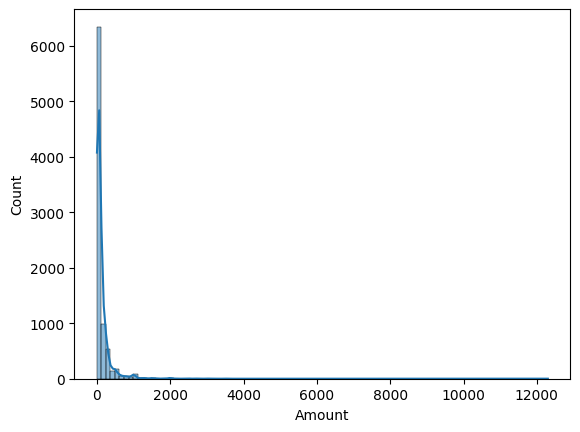

In [ ]:
sns.histplot(data=df['Amount'], kde=True, bins= 100)

<Axes: ylabel='Amount'>

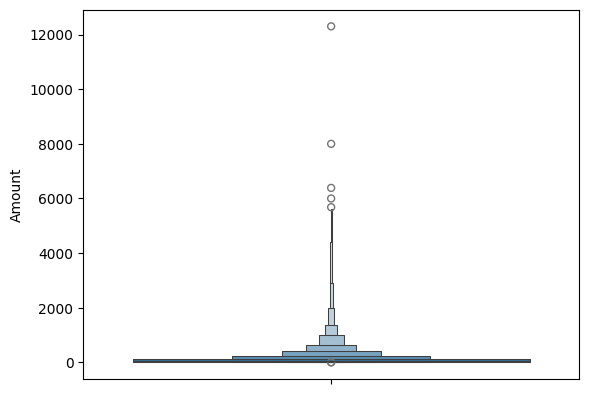

In [ ]:
sns.boxenplot(data=df['Amount'])

In [ ]:
df['Amount'].mode()[0]

20.0

In [ ]:
df['Amount'].median()

50.0

In [ ]:
df['Amount'].mean()

134.68921800947868

1. The data is extremely positively skewed.
2. The mode of the data is `20`, the median is `50` and the mean is `134.69`

<Axes: xlabel='Fees', ylabel='Count'>

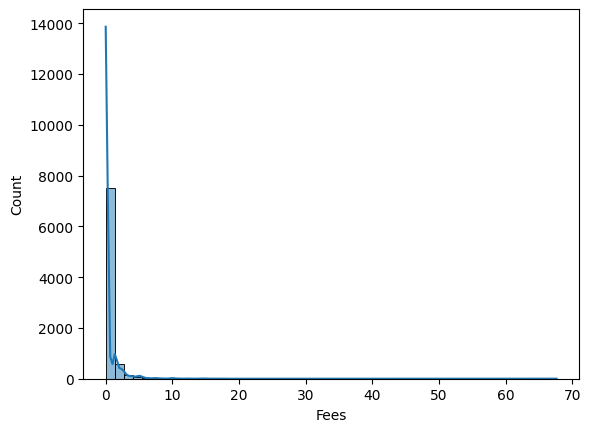

In [ ]:
sns.histplot(data=df['Fees'], kde=True, bins=50)

In [ ]:
df.set_index(keys='Date')

,Name,Fees,Amount,Status,Phone
Date,,,,,
2019-03-29 15:19:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557
2019-03-29 18:49:00,HOSEA KIHARA,0.0,200.0,Complete,254757140643
2019-03-29 19:42:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557
2019-03-30 15:41:00,ABIGAIL MUNENE,0.0,70.0,Complete,254713794210
2019-04-03 11:39:00,IAN MUKUNDI,0.0,20.0,Complete,254795429253
...,...,...,...,...,...
2024-03-26 13:12:00,JANE KARANJA,0.0,20.0,Complete,254703681535
2024-03-26 13:31:00,ANN NJOKI,0.0,20.0,Complete,254722838482
2024-03-26 18:18:00,GEORGE KIMANI,0.0,50.0,Complete,254727402133


In [ ]:
df['Dates'] = df['Date'].dt.date
df

,Date,Name,Fees,Amount,Status,Phone,Dates
0,2019-03-29 15:19:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557,2019-03-29
1,2019-03-29 18:49:00,HOSEA KIHARA,0.0,200.0,Complete,254757140643,2019-03-29
2,2019-03-29 19:42:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557,2019-03-29
3,2019-03-30 15:41:00,ABIGAIL MUNENE,0.0,70.0,Complete,254713794210,2019-03-30
4,2019-04-03 11:39:00,IAN MUKUNDI,0.0,20.0,Complete,254795429253,2019-04-03
...,...,...,...,...,...,...,...
8435,2024-03-26 13:12:00,JANE KARANJA,0.0,20.0,Complete,254703681535,2024-03-26
8436,2024-03-26 13:31:00,ANN NJOKI,0.0,20.0,Complete,254722838482,2024-03-26
8437,2024-03-26 18:18:00,GEORGE KIMANI,0.0,50.0,Complete,254727402133,2024-03-26
8438,2024-03-26 19:14:00,JOHN NDIRANGU,0.0,100.0,Complete,254727423654,2024-03-26


In [ ]:
df['Name'].nunique()

3851

<Axes: ylabel='Name,Phone'>

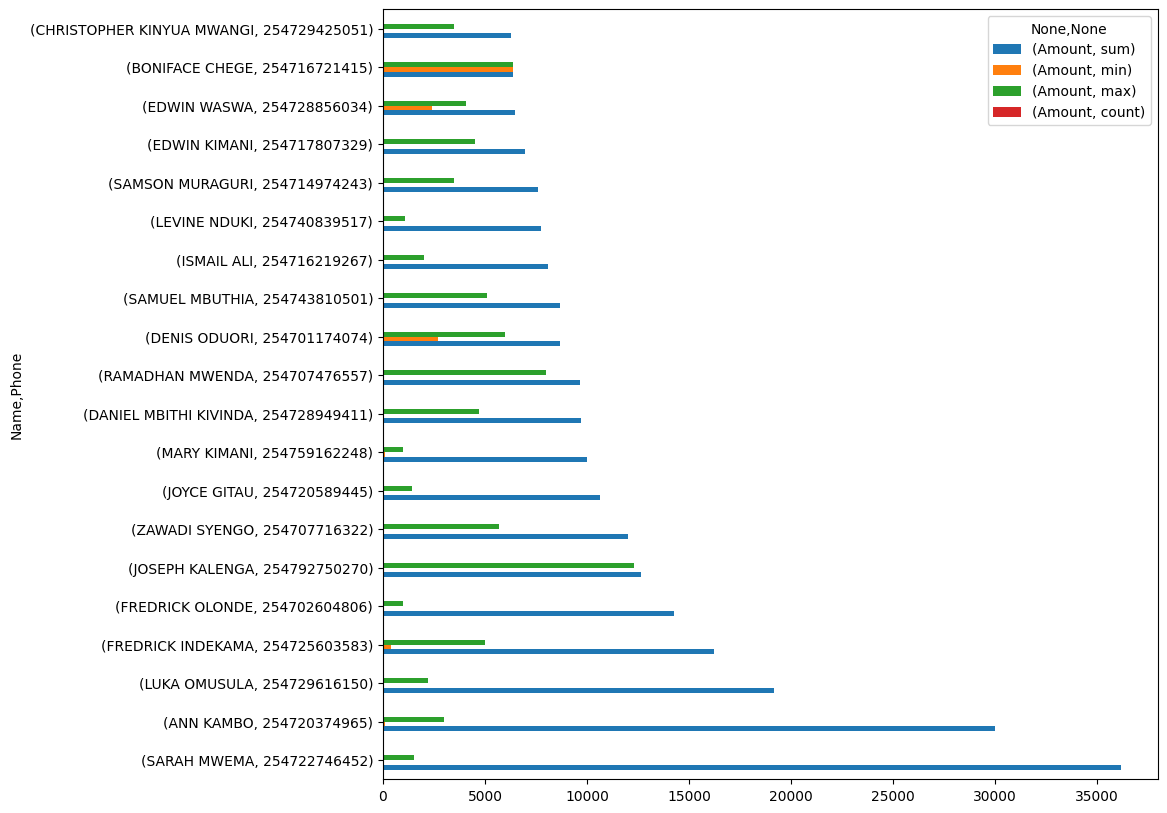

In [ ]:
(df
.groupby(['Name','Phone'])
.agg({'Amount' : ['sum','min','max','count']})
.sort_values(by=('Amount','sum'), ascending=False)
.nlargest(20, columns=('Amount','sum'))
.plot(kind='barh',figsize=(10,10))
)


In [ ]:
df1 = (df
       .groupby(['Name','Phone'])
       .agg({'Amount' : ['sum','min','max','count']})
       .sort_values(by=('Amount','count'), ascending=False)
       .nlargest(20, columns=('Amount','count'))
       #.plot(kind='barh',figsize=(10,10))
       )
df1

Amount                     
                                  sum    min     max count
Name            Phone                                     
WILLIAM MWINGA  254722223487   4120.0   10.0   350.0   175
STEPHEN MUNYAO  254741181266   5720.0   20.0   500.0   160
SARAH MWEMA     254722746452  36165.0   20.0  1500.0    73
VICTOR MALOWA   254705261696   1710.0   10.0    60.0    62
ERICK ONGWEN    254721955309   1985.0   10.0   300.0    60
FREDRICK OLONDE 254702604806  14260.0   50.0  1000.0    38
LEVINE NDUKI    254703760171   5310.0    5.0   750.0    38
ANN KAMBO       254720374965  29969.0  100.0  3000.0    37
DANIEL NGATHEKA 254706760116   2300.0   10.0   700.0    37
FRANCIS KIAO    254721950830   4555.0   20.0   300.0    35
JOHN KINYUGO    254725122749    715.0    5.0   100.0    35
ZAWADI SYENGO   254707716322  12023.0   30.0  5680.0    34
JUSTUS MBULUNZE 254713936893    998.0    3.0   140.0    34
MARTHA NJOROGE  254723452694   1055.0   20.0   200.0    33
JOYCE NG'ANG'A  254710651777   5991.0   34.0  1070.0    30
GORDON ANDEGA   254706561724   1510.0   10.0   150.0    29
DAVID KIIO      254790219497    970.0   10.0   200.0    29
BETH NDUNYU     254720371794   4765.0   45.0   550.0    26
SAMUEL MBUTHIA  254743810501   8675.0   10.0  5100.0    25
KELVIN ODONGA   254723049308   3535.0   10.0   800.0    24

<Axes: ylabel='Frequency'>

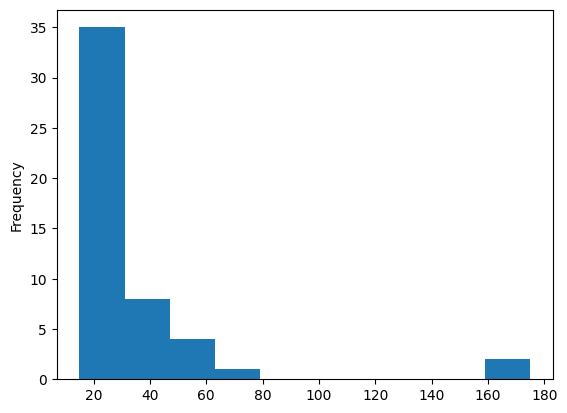

In [ ]:
df.groupby('Name').Amount.count().nlargest(50).plot(kind='hist')

<Axes: ylabel='Frequency'>

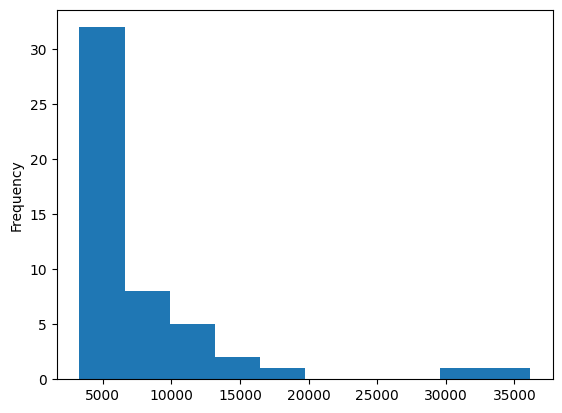

In [ ]:
df.groupby('Name').Amount.sum().nlargest(50).plot(kind='hist')

In [ ]:
df = df.set_index('Date')

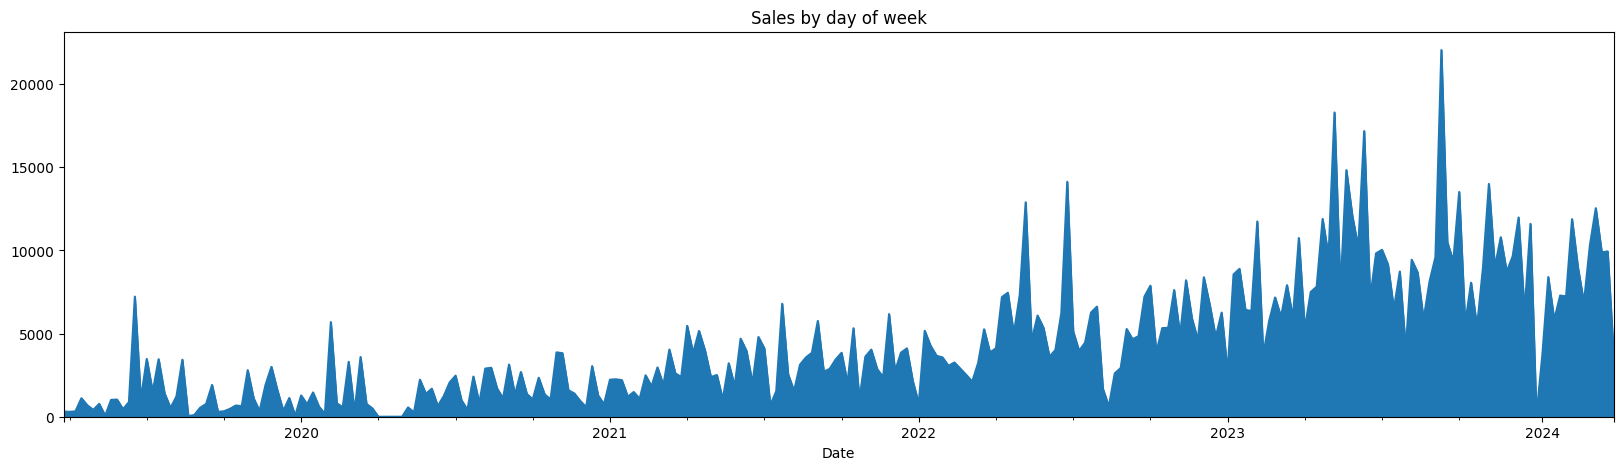

In [ ]:
# plotting sales by day of week
# Monday = 0, Sunday =6 
# shop is closed on Sundays
df.Amount.resample('W').sum().plot(kind='area', x='Date', y='Amount', figsize=(20,5))
plt.title('Sales by day of week')
plt.show()

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day_of_week

In [ ]:
def create_features(df):
    '''
    Create new features from the date index
    '''
    df=df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.dayofweek
    df['month'] = df.index.month
    df['day_name'] = df.index.day_name()
    return df

In [ ]:
df = create_features(df)

In [ ]:
df

,Name,Fees,Amount,Status,Phone,Dates,year,month,day,hour,day_name
Date,,,,,,,,,,,
2019-03-29 15:19:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557,2019-03-29,2019,3,4,15,Friday
2019-03-29 18:49:00,HOSEA KIHARA,0.0,200.0,Complete,254757140643,2019-03-29,2019,3,4,18,Friday
2019-03-29 19:42:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557,2019-03-29,2019,3,4,19,Friday
2019-03-30 15:41:00,ABIGAIL MUNENE,0.0,70.0,Complete,254713794210,2019-03-30,2019,3,5,15,Saturday
2019-04-03 11:39:00,IAN MUKUNDI,0.0,20.0,Complete,254795429253,2019-04-03,2019,4,2,11,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-26 13:12:00,JANE KARANJA,0.0,20.0,Complete,254703681535,2024-03-26,2024,3,1,13,Tuesday
2024-03-26 13:31:00,ANN NJOKI,0.0,20.0,Complete,254722838482,2024-03-26,2024,3,1,13,Tuesday
2024-03-26 18:18:00,GEORGE KIMANI,0.0,50.0,Complete,254727402133,2024-03-26,2024,3,1,18,Tuesday


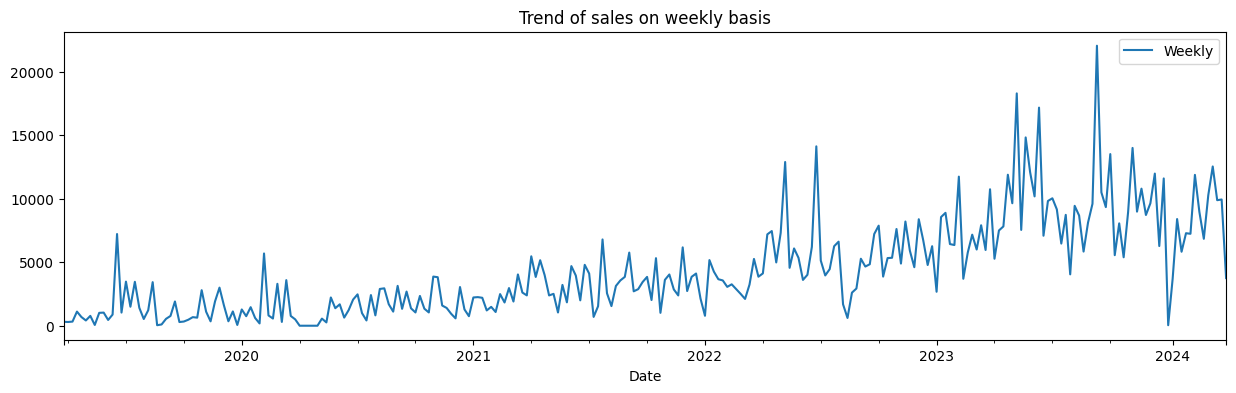

In [ ]:
plt.figure(figsize=(15,4))
df['Amount'].resample('W').sum().plot(label='Weekly')
plt.title('Trend of sales on weekly basis')
plt.legend()
plt.show()

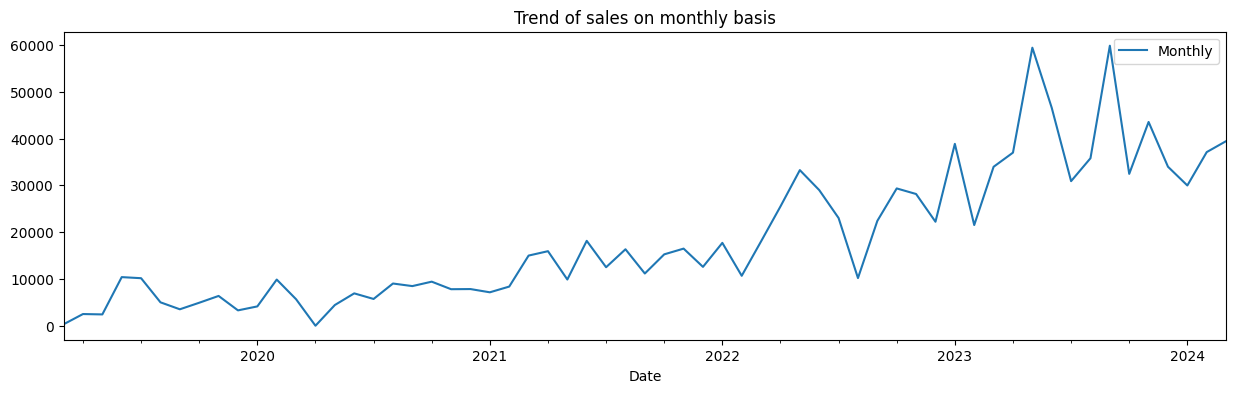

In [ ]:
plt.figure(figsize=(15,4))
df['Amount'].resample('M').sum().plot(label='Monthly')
plt.title('Trend of sales on monthly basis')
plt.legend()
plt.show()

There is an upward trend over time but there doesn't seem to be much seasonality.

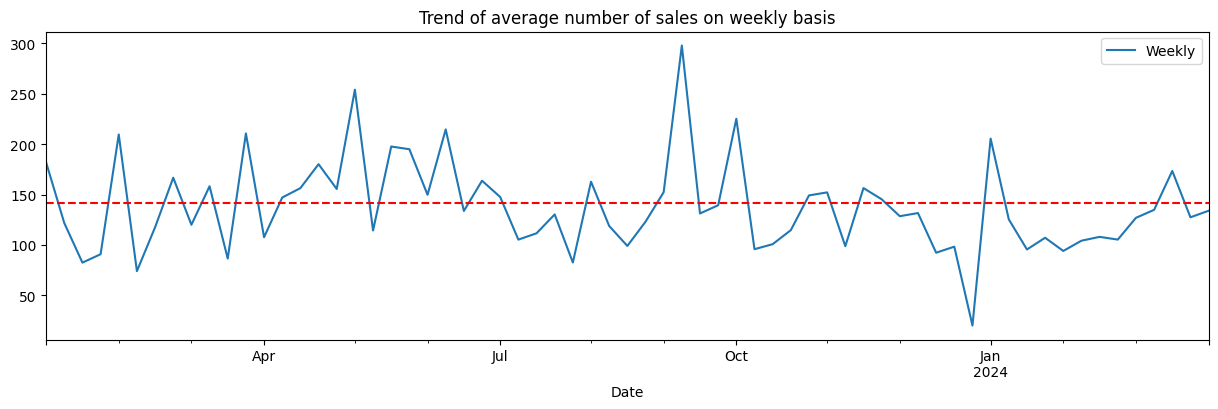

In [ ]:
plt.figure(figsize=(15,4))
df.loc['2023':'2024']['Amount'].resample('W').mean().plot(label='Weekly')
plt.axhline(y=df.loc['2023']['Amount'].mean(), color='r', linestyle='--')
plt.title('Trend of average number of sales on weekly basis')
plt.legend()
plt.show()

In [ ]:
df.hour > 0

Date
2019-03-29 15:19:00    True
2019-03-29 18:49:00    True
2019-03-29 19:42:00    True
2019-03-30 15:41:00    True
2019-04-03 11:39:00    True
                       ... 
2024-03-26 13:12:00    True
2024-03-26 13:31:00    True
2024-03-26 18:18:00    True
2024-03-26 19:14:00    True
2024-03-26 19:25:00    True
Name: hour, Length: 8440, dtype: bool

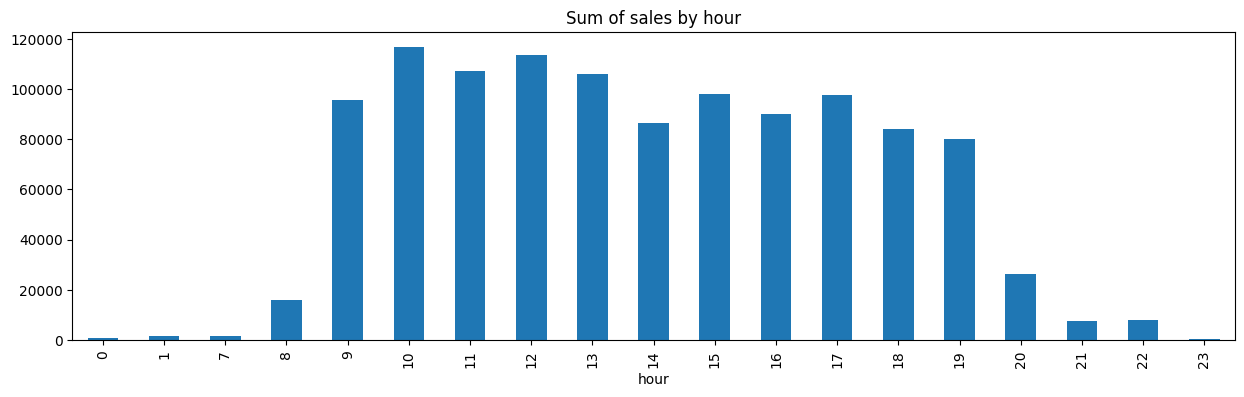

In [ ]:
#check performance by hours
plt.figure(figsize=(15,4))
df[['Amount','hour']].groupby('hour').Amount.sum().plot.bar()
plt.title('Sum of sales by hour')
plt.show()

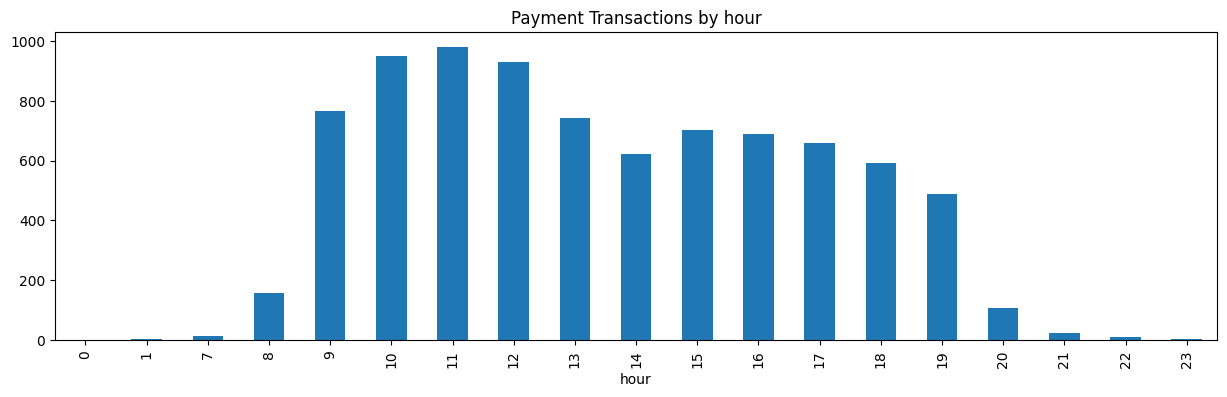

In [ ]:
plt.figure(figsize=(15,4))
df[['Amount','hour']].groupby('hour').Amount.count().plot.bar()
plt.title('Payment Transactions by hour')
plt.show()

1. The traffic of payments is highest between 10 a.m and 1 p.m. 
2. There is a second peak between 3 and 6 pm

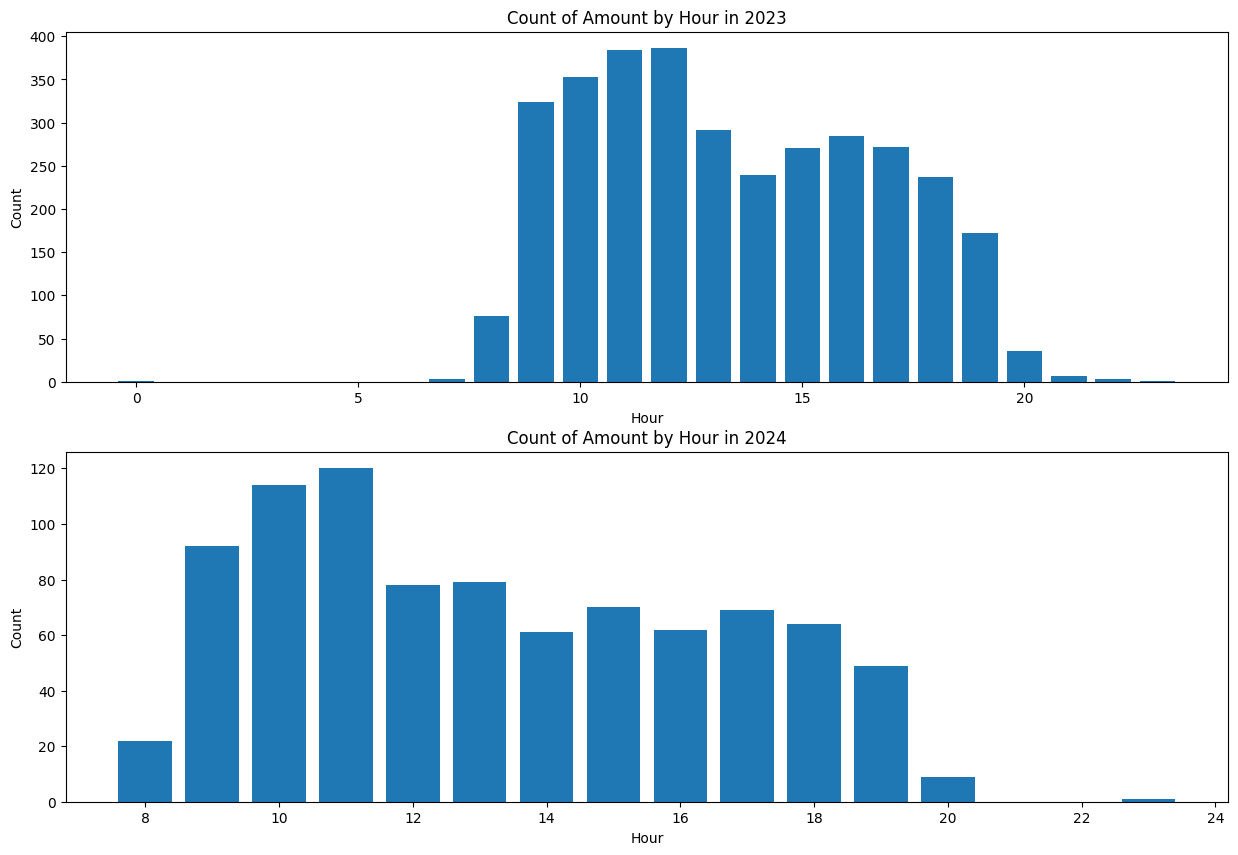

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

df_2023 = df.loc['2023'][['Amount','hour']].groupby('hour').Amount.count()
df_2024 = df.loc['2024'][['Amount','hour']].groupby('hour').Amount.count()

axs[0].bar(df_2023.index, df_2023.values)
axs[0].set_title('Count of Amount by Hour in 2023')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Count')

axs[1].bar(df_2024.index, df_2024.values)
axs[1].set_title('Count of Amount by Hour in 2024')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Count')

plt.show()

In [ ]:
df_2 = pd.read_csv('transactions_report_2024-01-01_to_2024-05-31.csv', header=1, index_col='Date')
df_2.head(5)

,Transaction ID,Sender Identifier,Name,Till No.,Fees,Amount,MM System,Status
Date,,,,,,,,
2024-01-03 09:08,SA37XFWES5,254722223487,WILLIAM MWINGA,632868,0.00,20.0,M-PESA,Complete
2024-01-03 09:44,SA33XJATRP,254797136110,WINFRED MUTUA,632868,0.00,10.0,M-PESA,Complete
2024-01-03 09:57,SA32XKO5KU,254725955839,Mbugua Njoroge,632868,0.00,50.0,M-PESA,Complete
2024-01-03 10:09,SA30XLUKJW,254716867109,ELIJAH KIGURU,632868,5.94,1080.0,M-PESA,Complete
2024-01-03 10:30,SA36XO3GN2,254723522784,JOSPHINE GICHORA,632868,0.00,180.0,M-PESA,Complete


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632 entries, 2024-01-03 09:08 to 2024-05-31 15:41
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction ID     1632 non-null   object 
 1   Sender Identifier  1632 non-null   int64  
 2   Name               1632 non-null   object 
 3   Till No.           1632 non-null   int64  
 4   Fees               1632 non-null   float64
 5   Amount             1632 non-null   float64
 6   MM System          1632 non-null   object 
 7   Status             1632 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 114.8+ KB


In [ ]:
df_2['Number'] = df_2['Sender Identifier'].rename_axis('Number').astype('str')

In [ ]:
mpesa = df_2.drop(columns=['Transaction ID', 'Sender Identifier', 'Till No.', 'MM System'])
mpesa

,Name,Fees,Amount,Status,Number
Date,,,,,
2024-01-03 09:08,WILLIAM MWINGA,0.00,20.0,Complete,254722223487
2024-01-03 09:44,WINFRED MUTUA,0.00,10.0,Complete,254797136110
2024-01-03 09:57,Mbugua Njoroge,0.00,50.0,Complete,254725955839
2024-01-03 10:09,ELIJAH KIGURU,5.94,1080.0,Complete,254716867109
2024-01-03 10:30,JOSPHINE GICHORA,0.00,180.0,Complete,254723522784
...,...,...,...,...,...
2024-05-31 14:16,Stephen Njuguna,0.00,10.0,Complete,254798517727
2024-05-31 14:33,JOHN MUTHONI,0.00,20.0,Complete,254712048718
2024-05-31 15:00,Stephen Njuguna,0.00,10.0,Complete,254798517727


In [ ]:
mpesa.index = pd.to_datetime(mpesa.index)
mpesa

,Name,Fees,Amount,Status,Number
Date,,,,,
2024-01-03 09:08:00,WILLIAM MWINGA,0.00,20.0,Complete,254722223487
2024-01-03 09:44:00,WINFRED MUTUA,0.00,10.0,Complete,254797136110
2024-01-03 09:57:00,Mbugua Njoroge,0.00,50.0,Complete,254725955839
2024-01-03 10:09:00,ELIJAH KIGURU,5.94,1080.0,Complete,254716867109
2024-01-03 10:30:00,JOSPHINE GICHORA,0.00,180.0,Complete,254723522784
...,...,...,...,...,...
2024-05-31 14:16:00,Stephen Njuguna,0.00,10.0,Complete,254798517727
2024-05-31 14:33:00,JOHN MUTHONI,0.00,20.0,Complete,254712048718
2024-05-31 15:00:00,Stephen Njuguna,0.00,10.0,Complete,254798517727


In [ ]:
mpesa = create_features(mpesa)

In [ ]:
mpesa.to_csv('mpesa_transactions_2024.csv')